In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


Data Types:

1. Numeric - Continuous : avg_training_score, age
2. Numeric - Discrete : length_of_service, no_of_trainings
3. Categorical - Nominal : KPIs_met >80%, awards_won?
4. Categorical - Ordinal : previous_year_rating 

department, region, education, gender, recruitment_channel require preprocessing and are categorical variables

Output variable: is_promoted

Other Variable: employee_id



In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
employee_id             23490 non-null int64
department              23490 non-null object
region                  23490 non-null object
education               22456 non-null object
gender                  23490 non-null object
recruitment_channel     23490 non-null object
no_of_trainings         23490 non-null int64
age                     23490 non-null int64
previous_year_rating    21678 non-null float64
length_of_service       23490 non-null int64
KPIs_met >80%           23490 non-null int64
awards_won?             23490 non-null int64
avg_training_score      23490 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [6]:
train_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [7]:
test_data.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

Note:

education  and previous_year_rating contain null values


In [8]:
numeric = ['avg_training_score', 'age', 'length_of_service', 'no_of_trainings']
category = ['KPIs_met >80%', 'awards_won?' ,'previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel']

In [9]:
for i in category:
    train_data[i] = train_data[i].astype('category')
    test_data[i] = test_data[i].astype('category')

train_data['is_promoted'] = train_data['is_promoted'].astype('category')

In [10]:
train_data.dtypes

employee_id                int64
department              category
region                  category
education               category
gender                  category
recruitment_channel     category
no_of_trainings            int64
age                        int64
previous_year_rating    category
length_of_service          int64
KPIs_met >80%           category
awards_won?             category
avg_training_score         int64
is_promoted             category
dtype: object

In [11]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

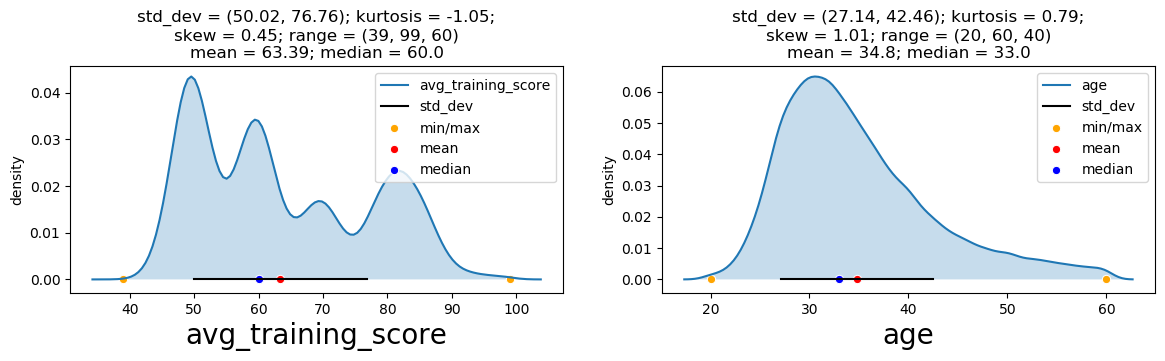

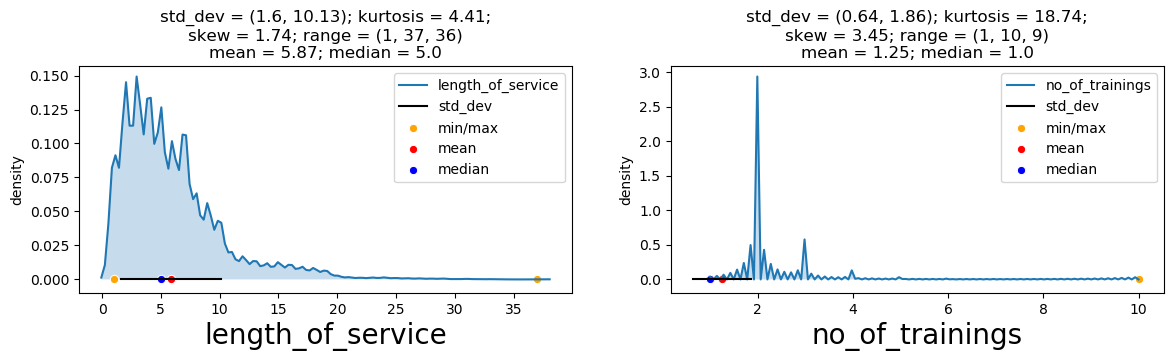

In [12]:
UVA_numeric(train_data,['avg_training_score', 'age'])
UVA_numeric(train_data,['length_of_service', 'no_of_trainings'])

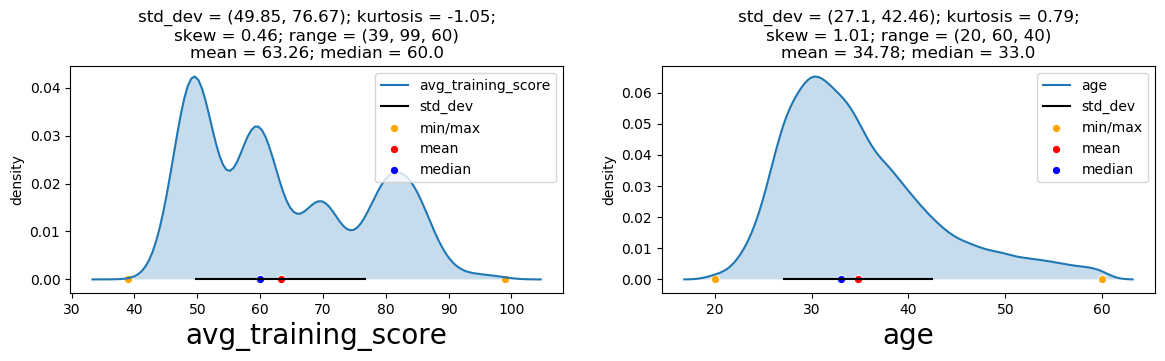

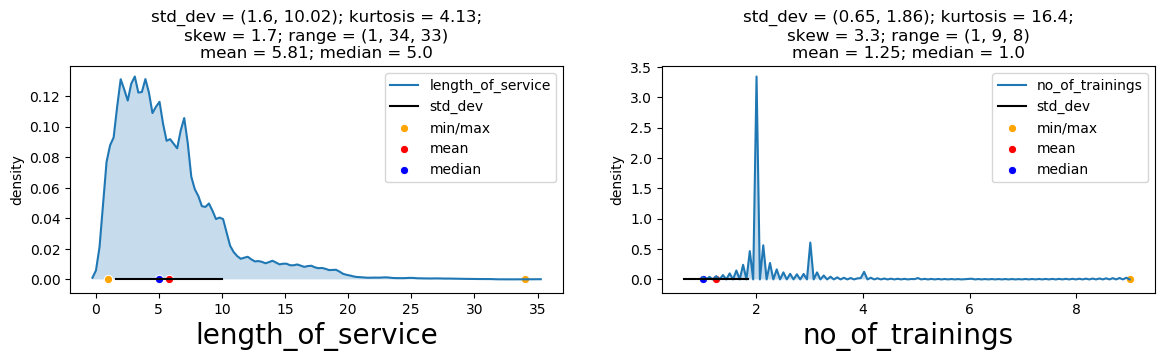

In [13]:
UVA_numeric(test_data,['avg_training_score', 'age'])
UVA_numeric(test_data,['length_of_service', 'no_of_trainings'])

Note:

For numeric variables train and test data have the same distribution


In [14]:
category1 = ['KPIs_met >80%', 'awards_won?']
category2 = ['previous_year_rating', 'department']
category3 = ['region', 'education']
category4 = ['gender', 'recruitment_channel']

In [15]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

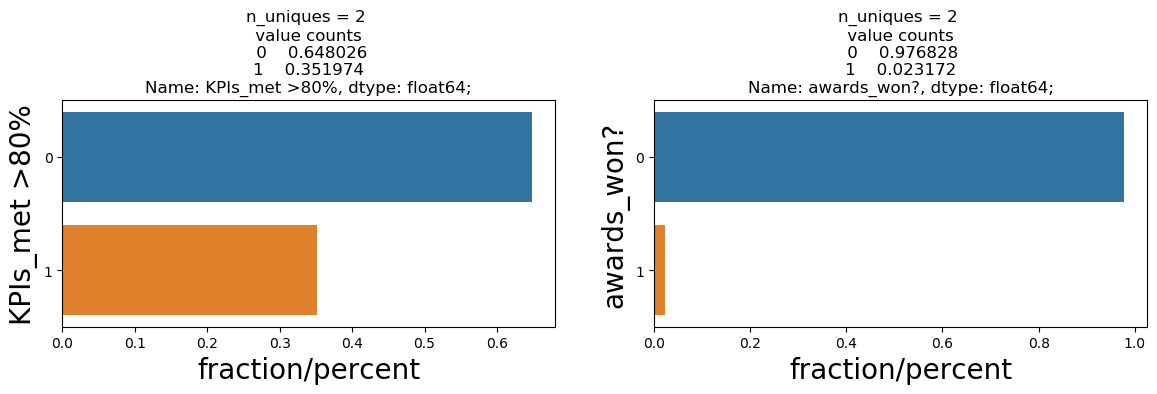

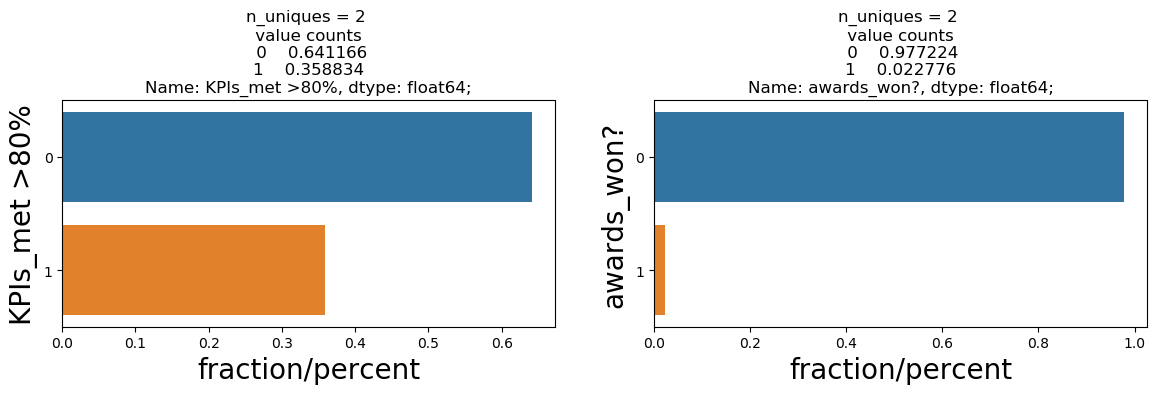

In [16]:
UVA_category(train_data, category1)
UVA_category(test_data, category1)

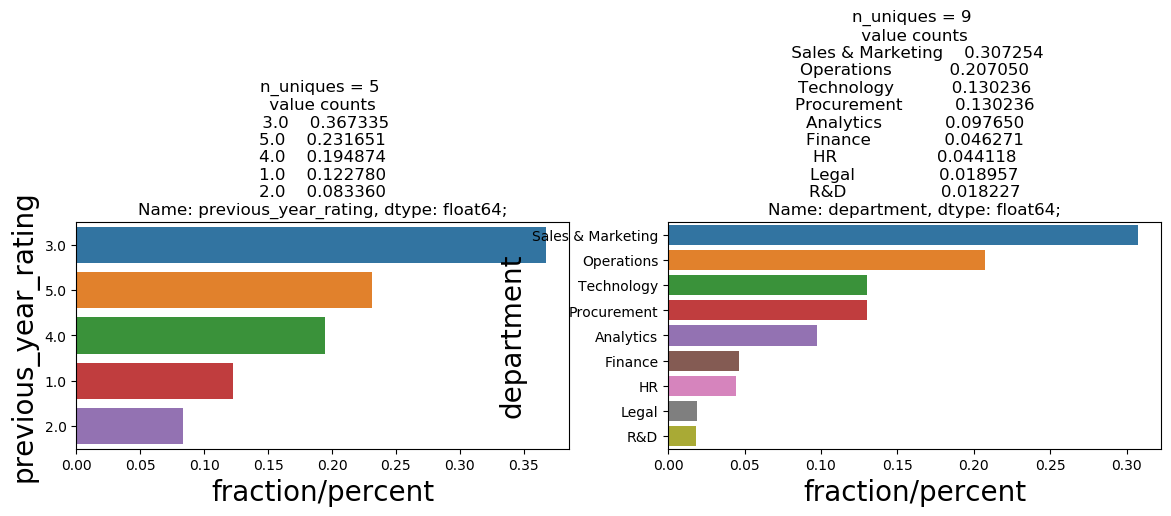

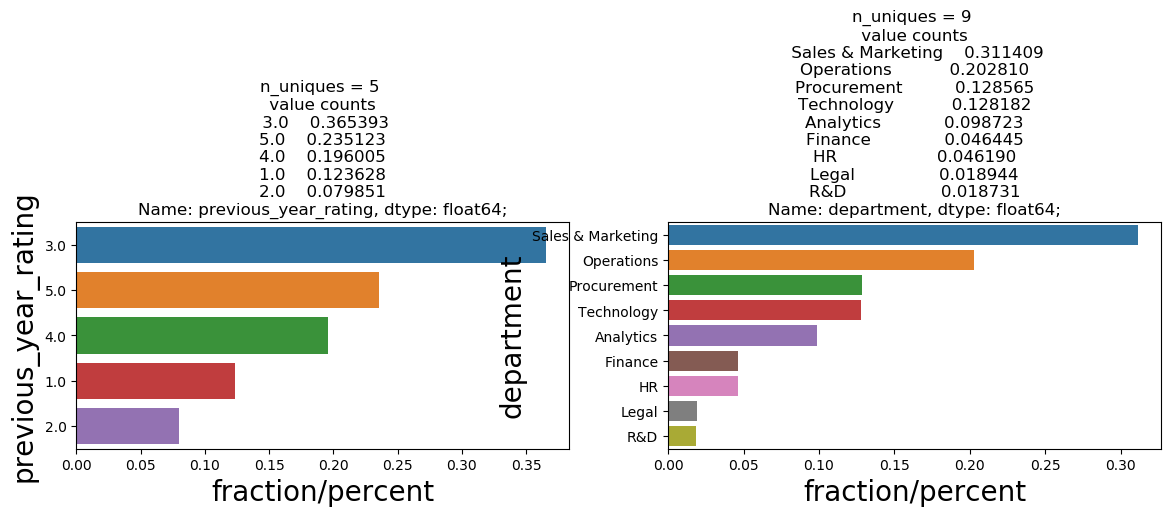

In [17]:
UVA_category(train_data, category2)
UVA_category(test_data, category2)

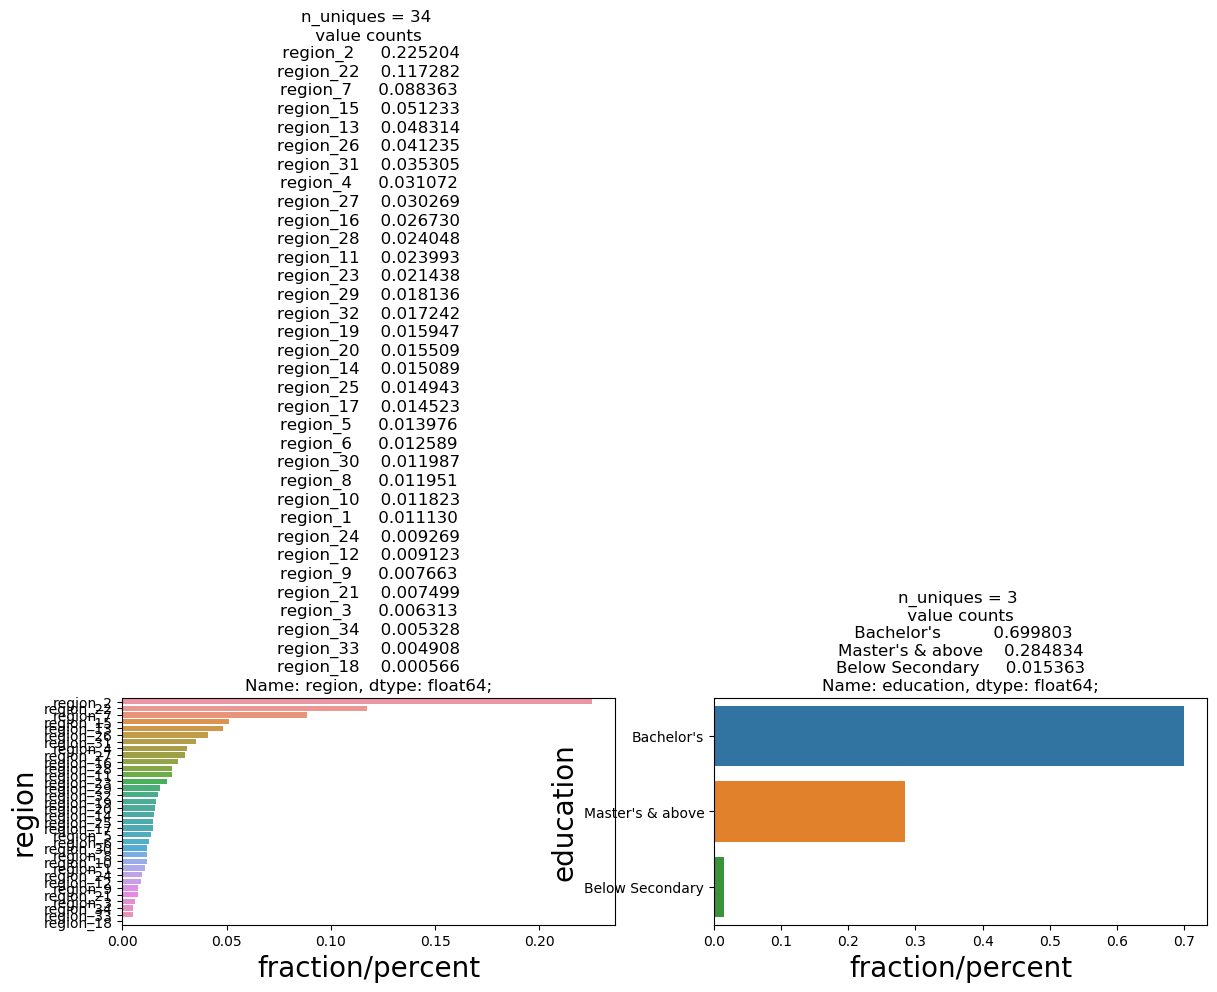

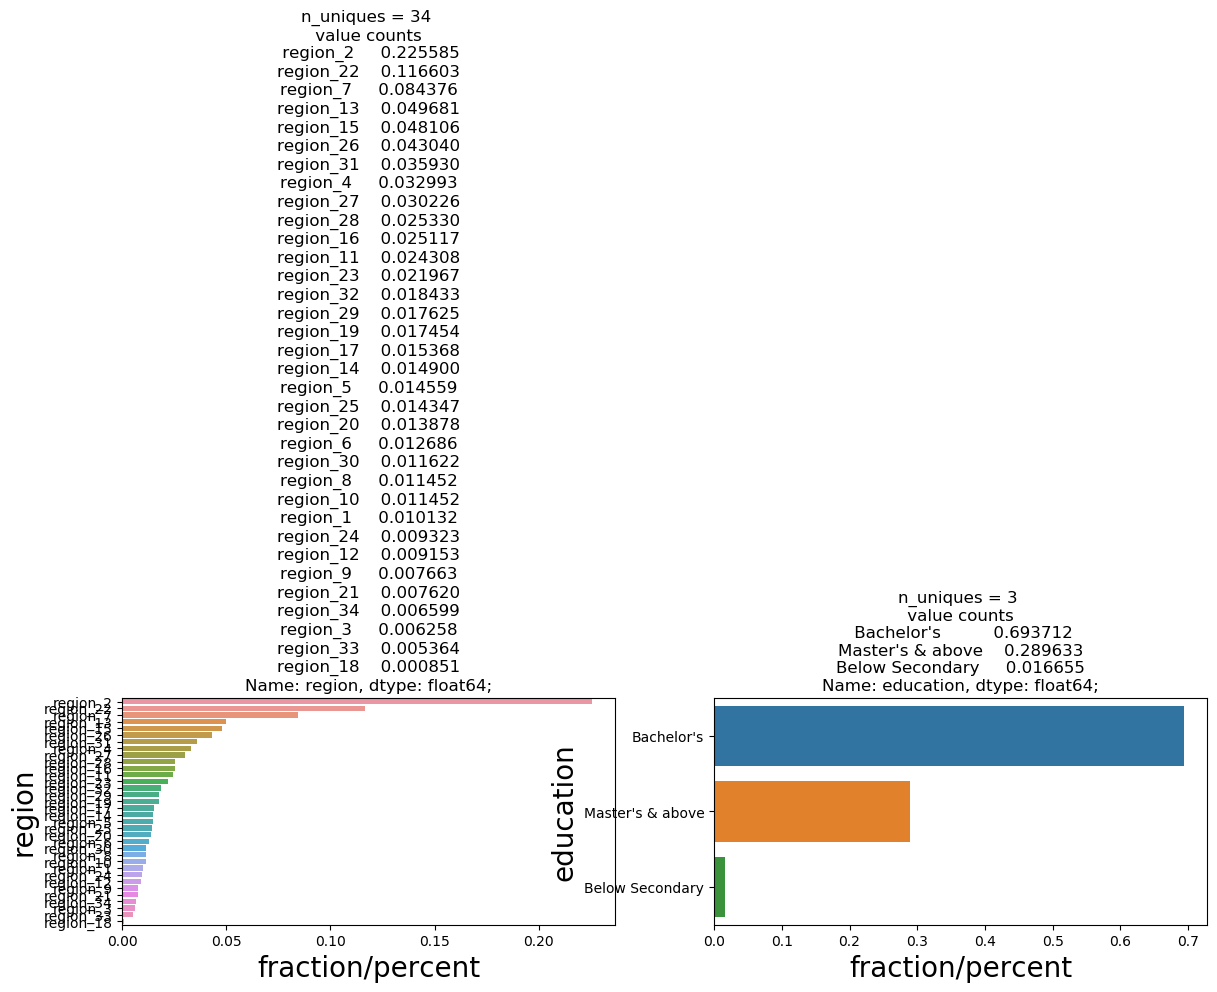

In [18]:
UVA_category(train_data, category3)
UVA_category(test_data, category3)

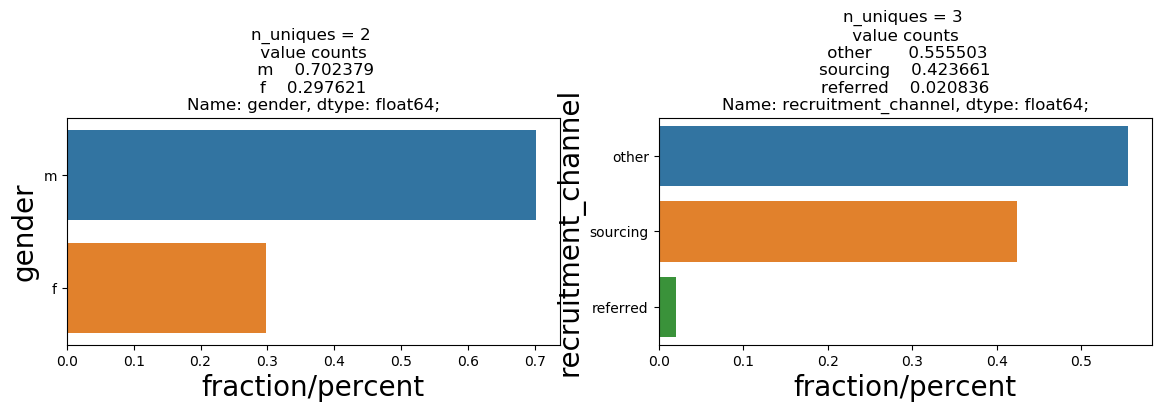

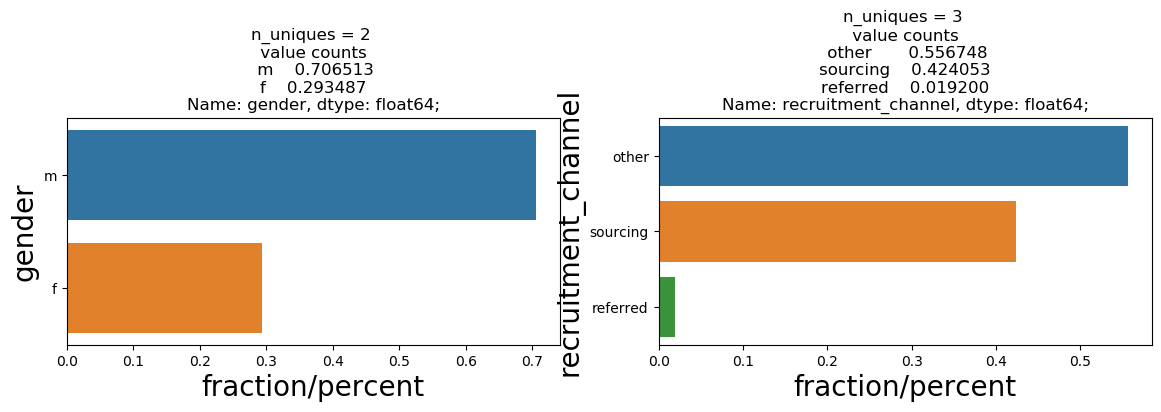

In [19]:
UVA_category(train_data, category4)
UVA_category(test_data, category4)

Note:

Distribution of train and test data look similar

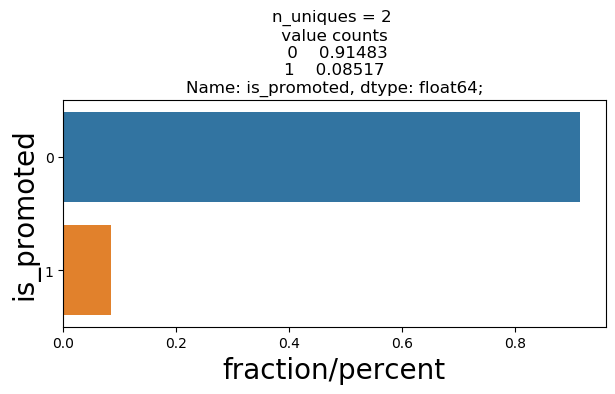

In [25]:
UVA_category(train_data,['is_promoted'])

In [20]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    #whis_low = med-(1.5*IQR)
    #whis_high = med+(1.5*IQR)
    whis_low = quant25-(1.5*IQR)
    whis_high = quant75+(1.5*IQR)
    
    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True


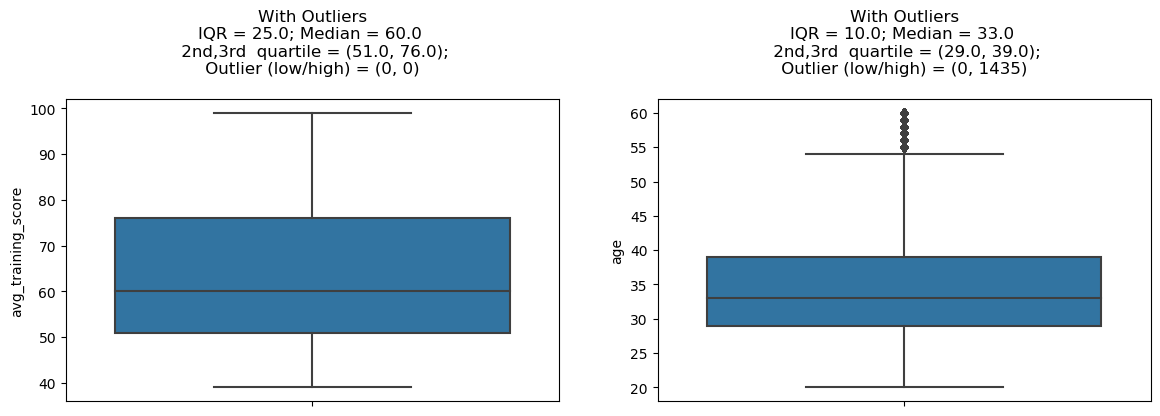

In [21]:
UVA_outlier(train_data,['avg_training_score', 'age'],)

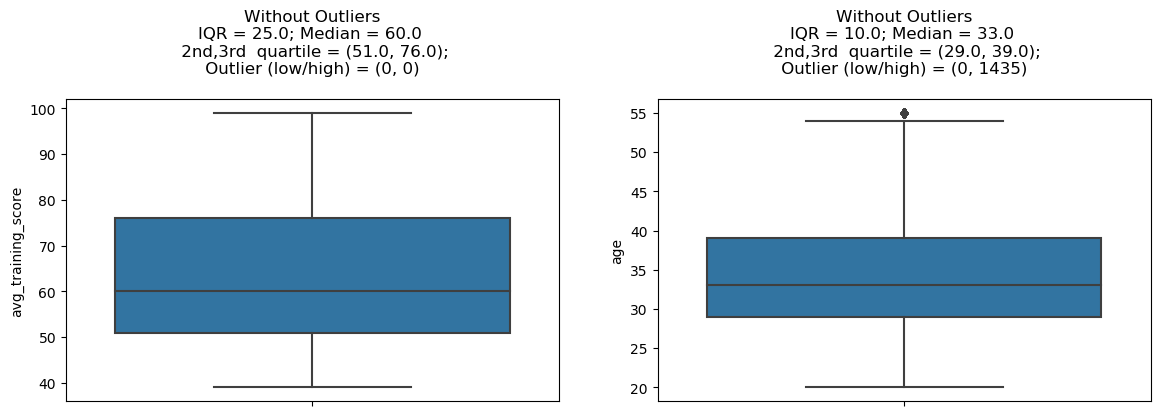

In [22]:
UVA_outlier(train_data,['avg_training_score', 'age'],False)

True
True


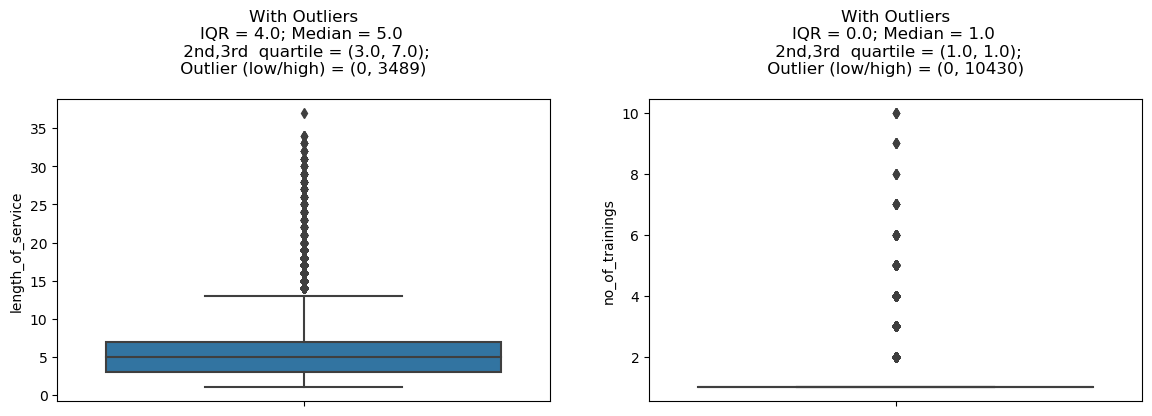

In [23]:
UVA_outlier(train_data,['length_of_service', 'no_of_trainings'],)

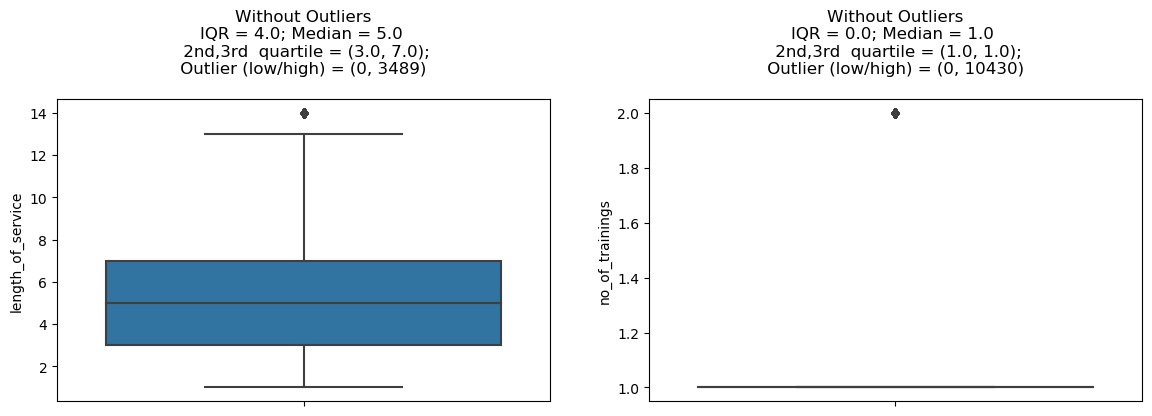

In [24]:
UVA_outlier(train_data,['length_of_service', 'no_of_trainings'],False)

Note:

As per the diagram, eventhough there are outlier values we cant say it is actually an outlier. For example, age > 55 is treated as an outlier but actually it is not. Another one is length of service > 15, actually it is not.

In [26]:
data_numeric = train_data[['avg_training_score', 'age', 'length_of_service', 'no_of_trainings']]

In [27]:
# calculating correlation
correlation = data_numeric.dropna().corr()
correlation

,avg_training_score,age,length_of_service,no_of_trainings
avg_training_score,1.000000,-0.048380,-0.038122,0.042517
age,-0.048380,1.000000,0.657111,-0.081278
length_of_service,-0.038122,0.657111,1.000000,-0.057275
no_of_trainings,0.042517,-0.081278,-0.057275,1.000000


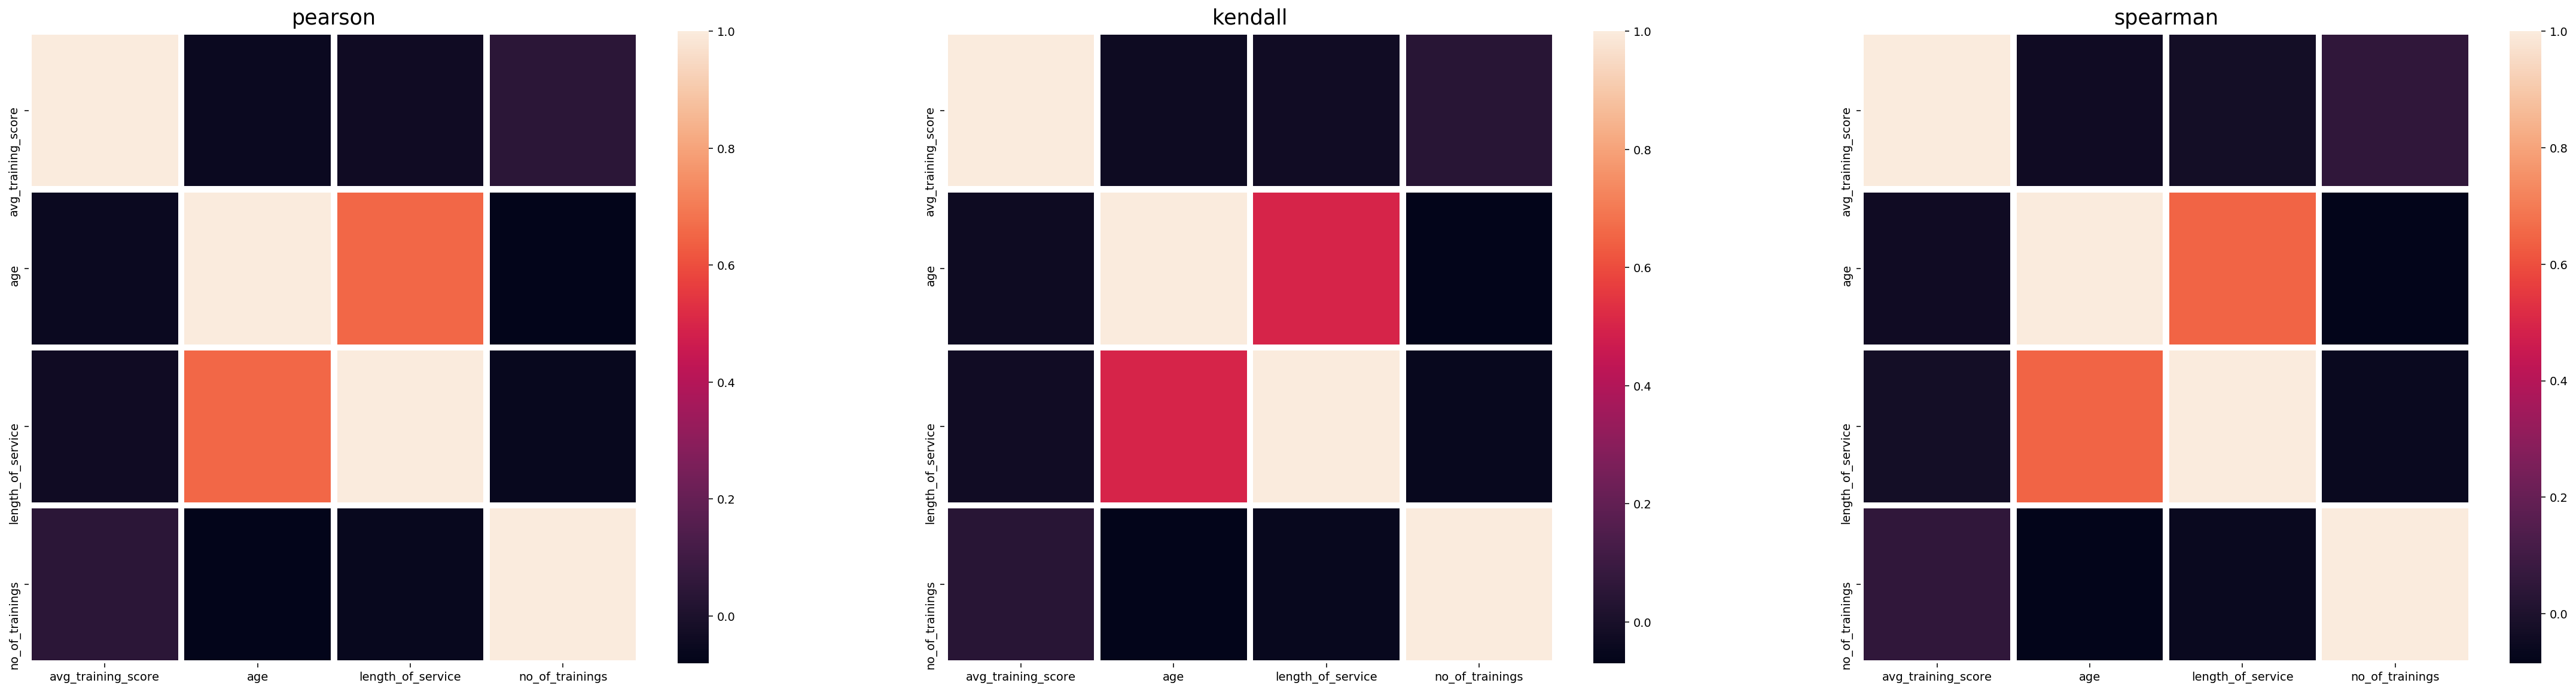

In [34]:
# plotting heatmap using all methods for all numerical variables
plt.figure(figsize=(40,10), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = data_numeric.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 5)
  plt.title(i, fontsize=18)



Note:

High correlation between age and length of service

<Figure size 840x560 with 0 Axes>

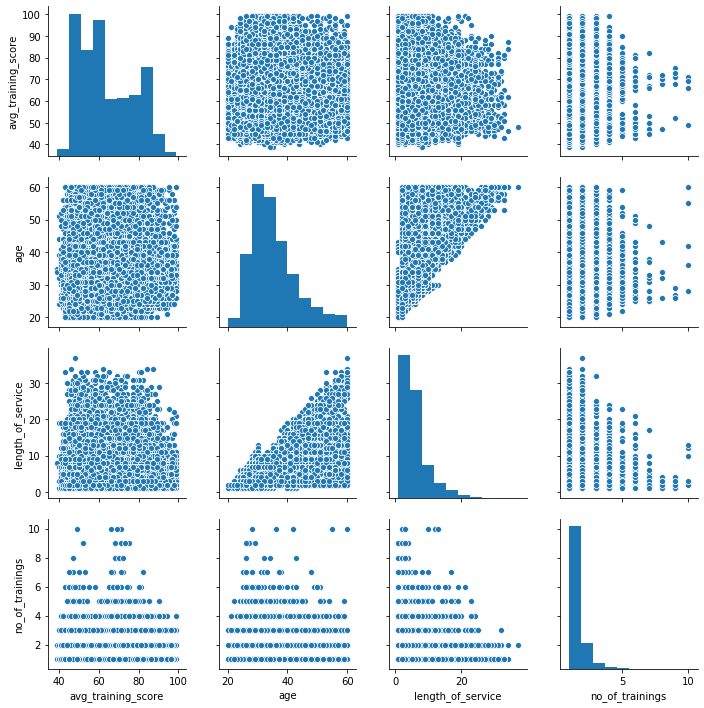

In [35]:
# scatter plot for transactional variables
plt.figure(dpi=140)
sns.pairplot(data_numeric)

In [36]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

In [ ]:
numeric = ['avg_training_score', 'age', 'length_of_service', 'no_of_trainings']
category = ['KPIs_met >80%', 'awards_won?' ,'previous_year_rating', 'department', 'region', 'education', 'gender', 'recruitment_channel']

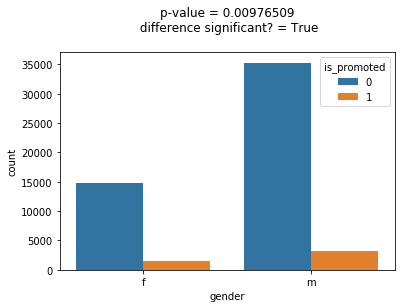

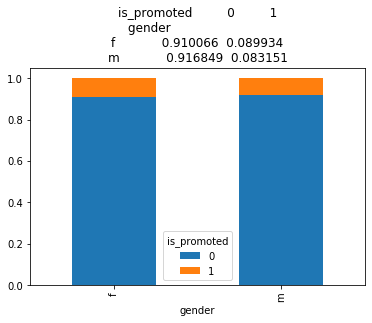

In [38]:
BVA_categorical_plot(train_data, 'is_promoted', 'gender')

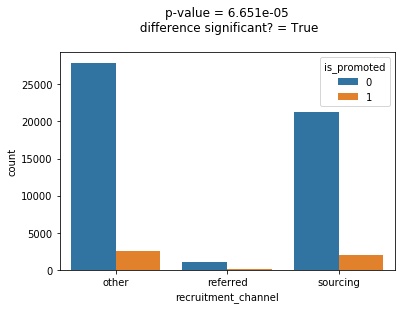

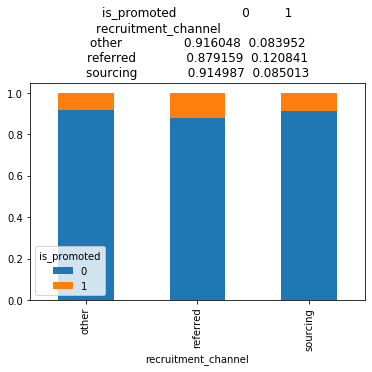

In [39]:
BVA_categorical_plot(train_data, 'is_promoted', 'recruitment_channel')

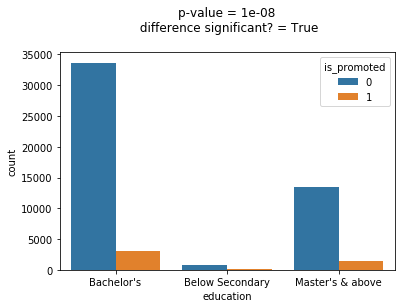

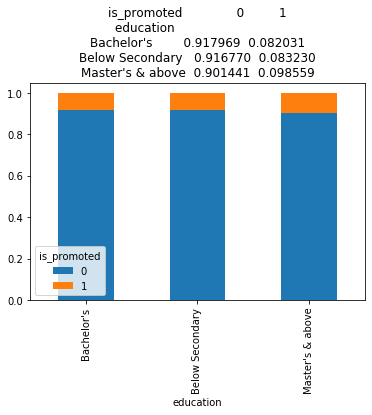

In [46]:
BVA_categorical_plot(train_data, 'is_promoted', 'education')

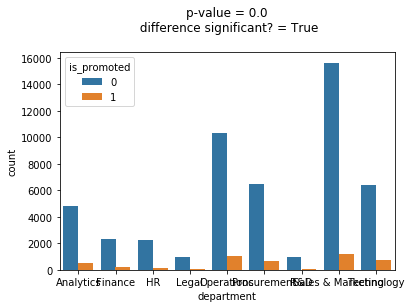

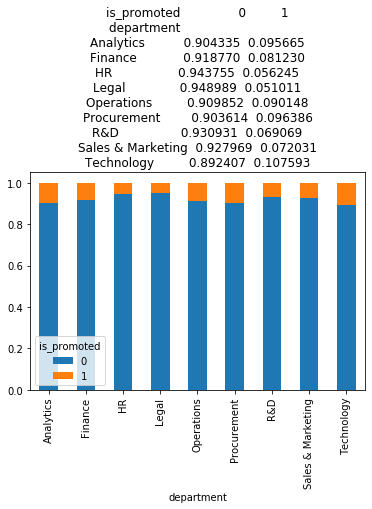

In [41]:
BVA_categorical_plot(train_data, 'is_promoted', 'department')

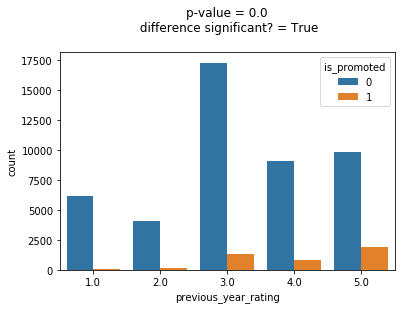

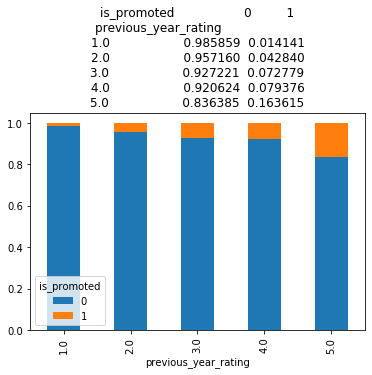

In [42]:
BVA_categorical_plot(train_data, 'is_promoted', 'previous_year_rating')

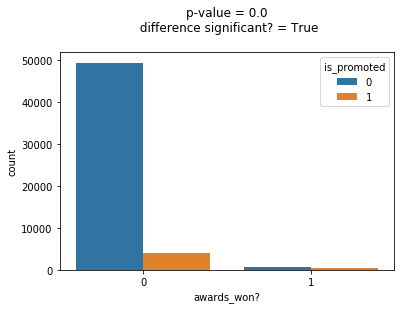

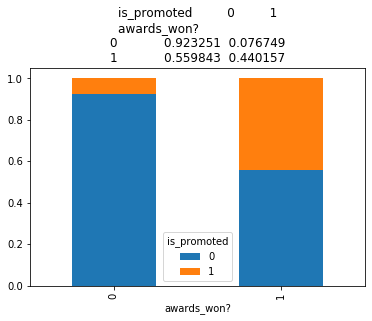

In [43]:
BVA_categorical_plot(train_data, 'is_promoted', 'awards_won?')

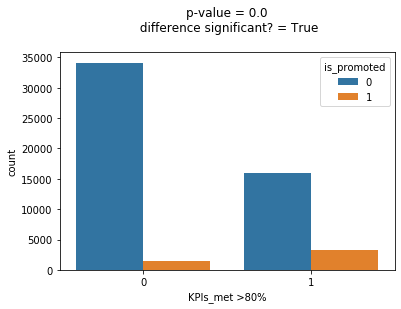

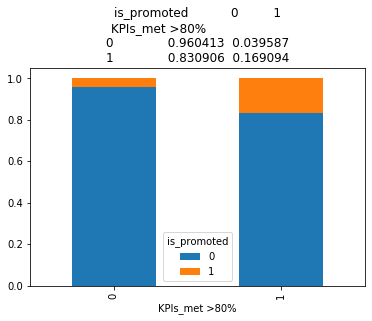

In [44]:
BVA_categorical_plot(train_data, 'is_promoted', 'KPIs_met >80%')

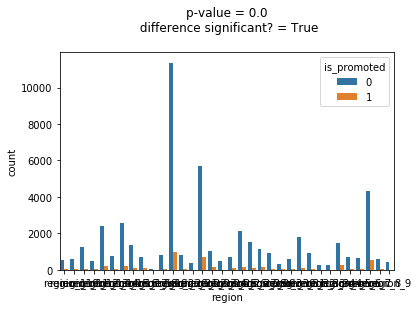

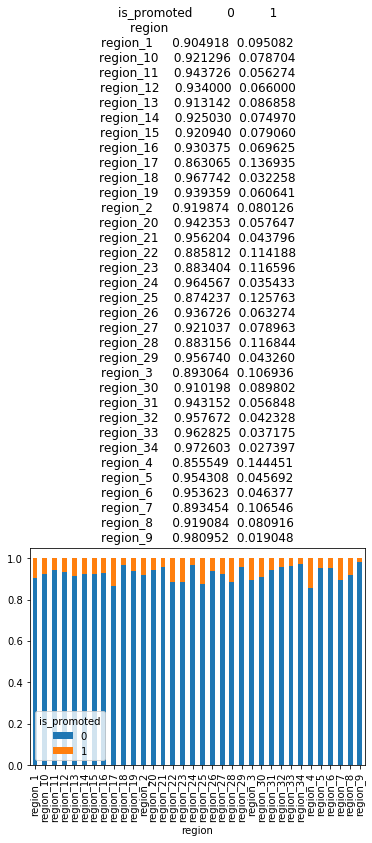

In [45]:
BVA_categorical_plot(train_data, 'is_promoted', 'region')

Note:

KPI met, Awards Won, Previous year rating has some relationship with promotion

In [47]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [49]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [50]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

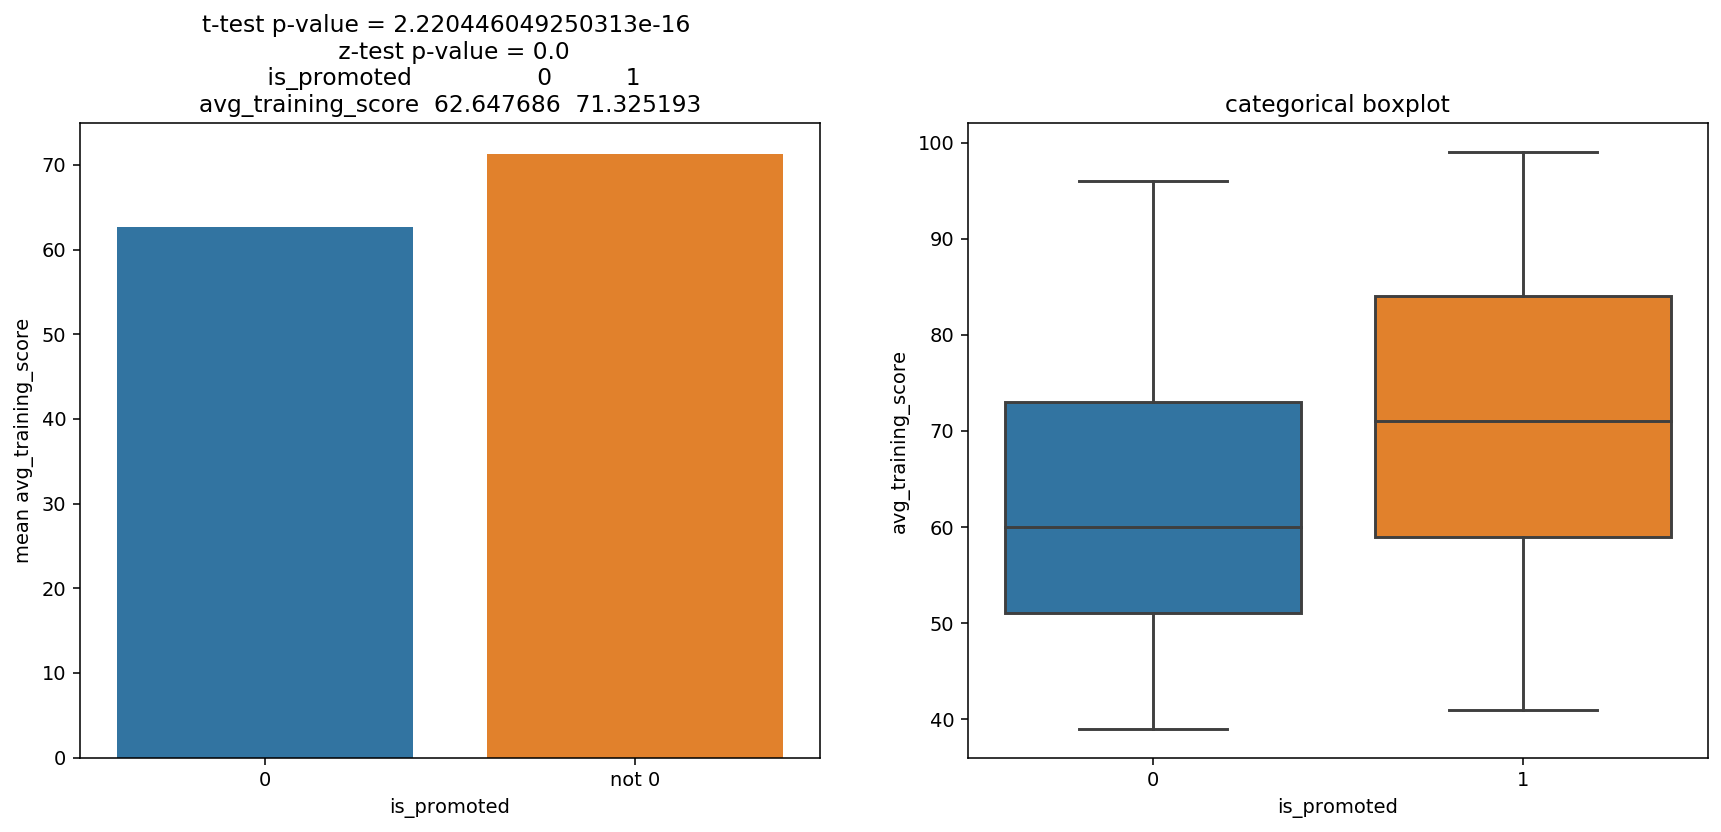

In [52]:
Bivariate_cont_cat(train_data, 'avg_training_score', 'is_promoted', 0)

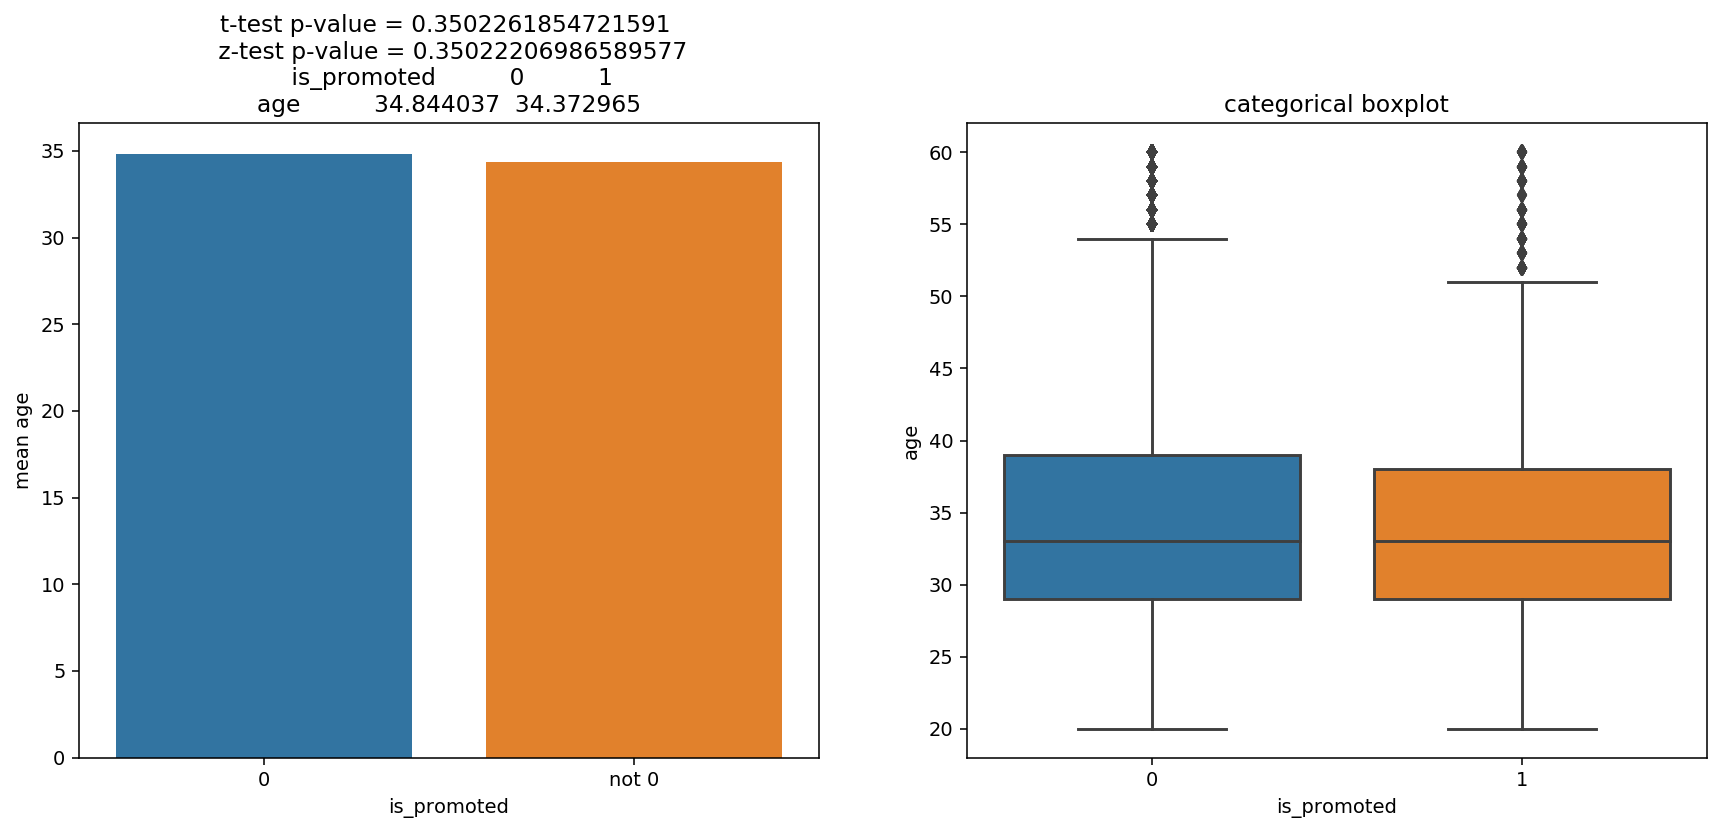

In [53]:
Bivariate_cont_cat(train_data, 'age', 'is_promoted', 0)

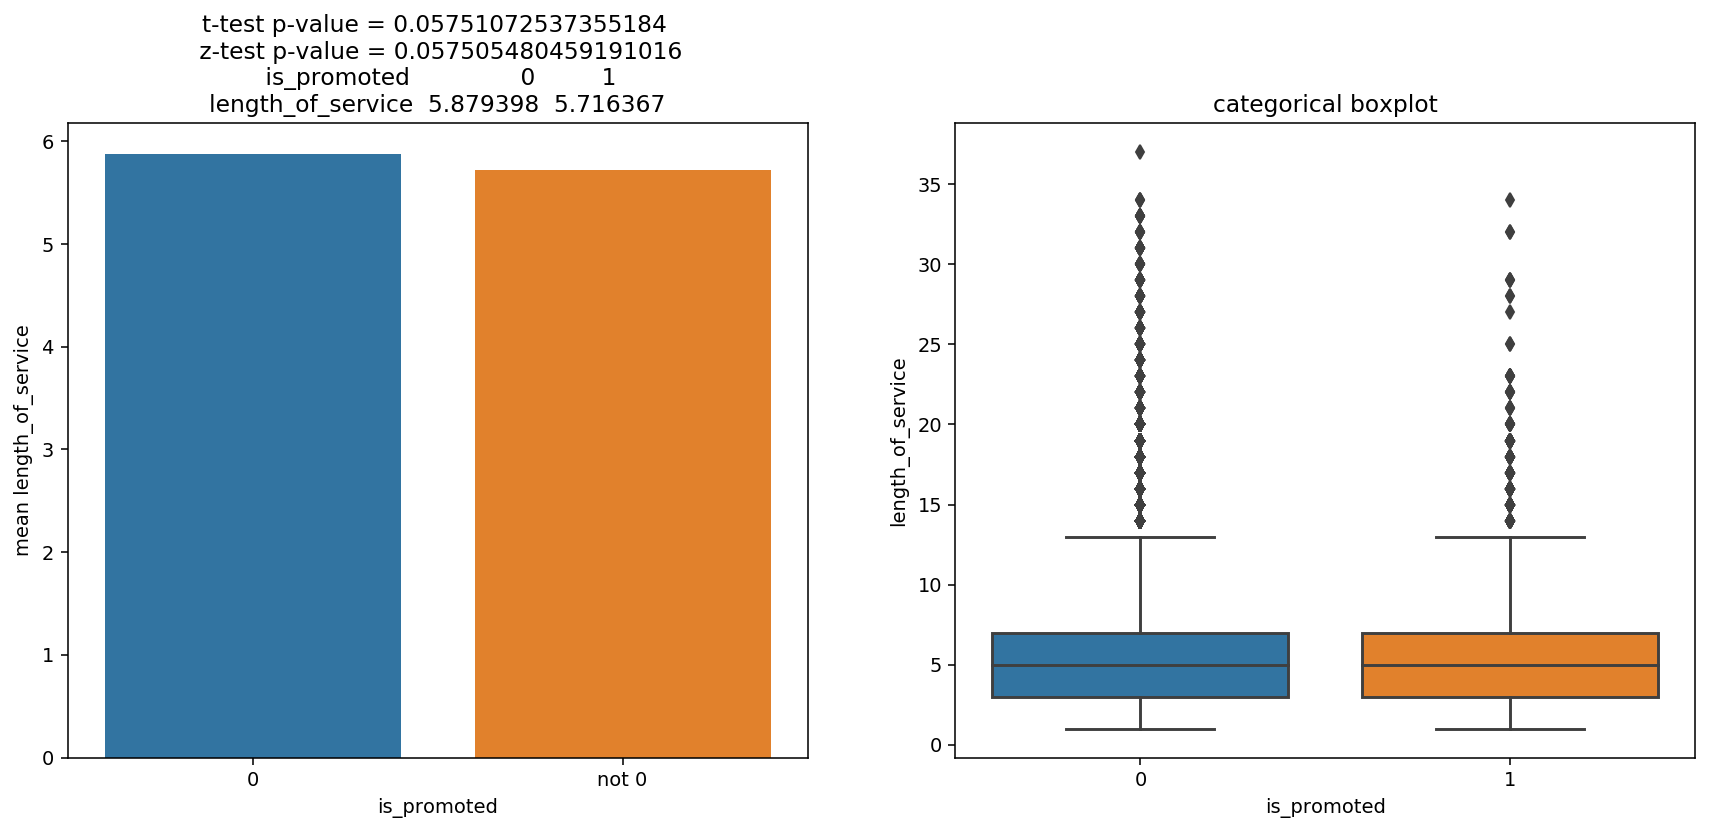

In [55]:
Bivariate_cont_cat(train_data, 'length_of_service', 'is_promoted', 0)

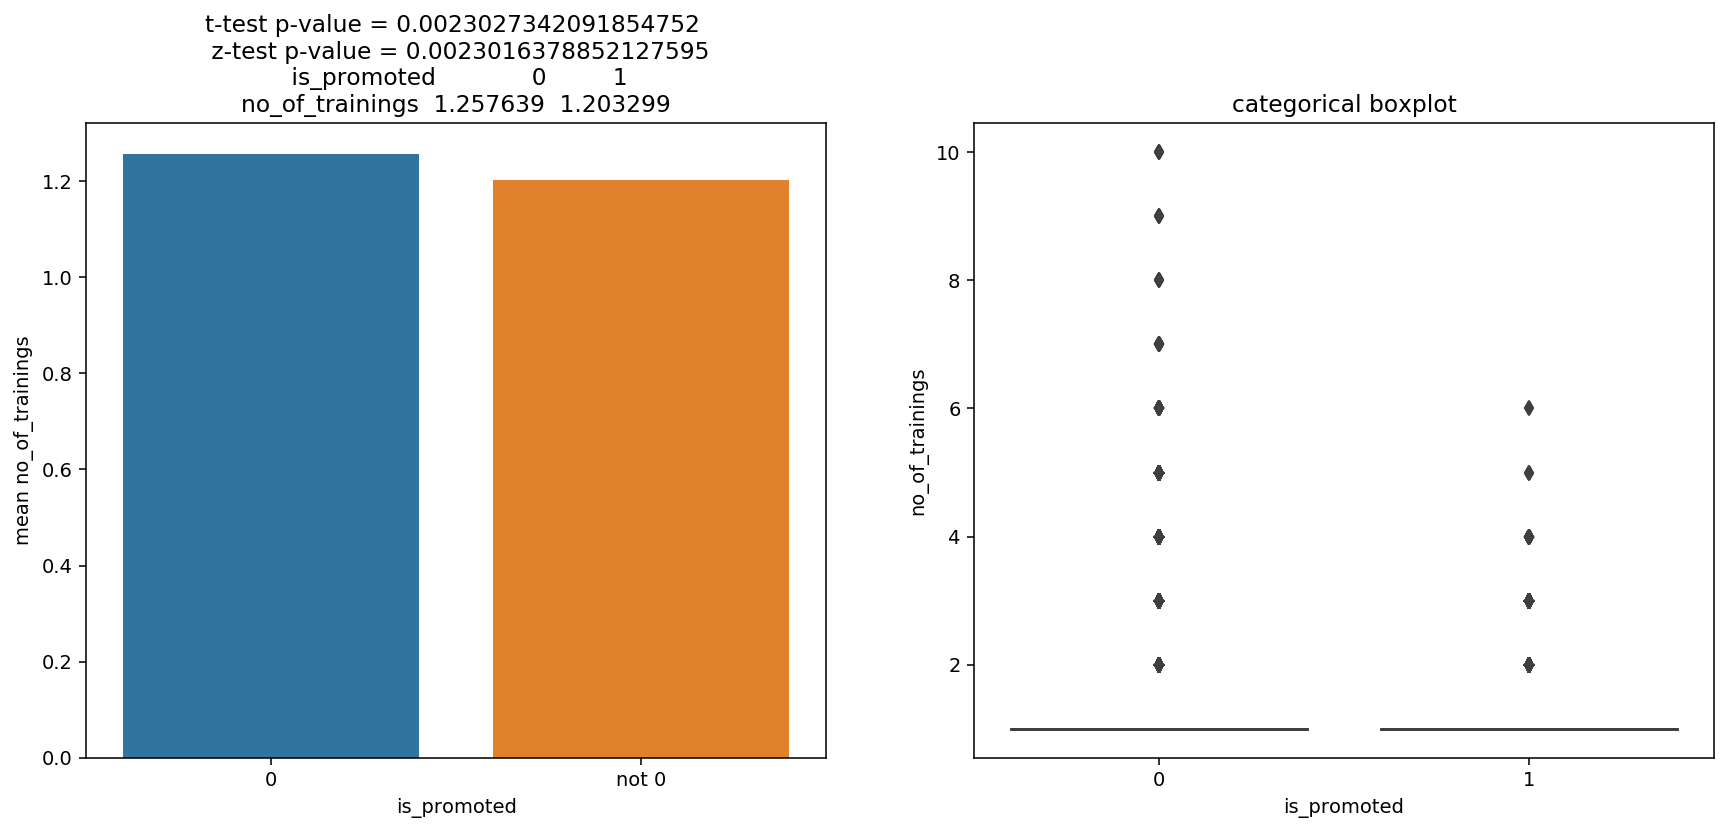

In [56]:
Bivariate_cont_cat(train_data, 'no_of_trainings', 'is_promoted', 0)